# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Thuycam Nguyen
- Shania Ie
- Tiffany Ho
- Shawn Kim
- Karina Sevilla

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

<a id='research_question'></a>
# Research Question

How have the number of concurrent users for various video game genres as well as US game sales been affected by the number of people in lockdown?

# Dataset(s)

Dataset Name: Steam charts <br>
Link to the dataset: https://www.kaggle.com/michau96/popularity-of-games-on-steam <br>
Number of observations: 83,790 <br>
This dataset includes the monthly number of players for various games on steam. These measurements go from the year 2012-2021.<br> <br>

Dataset Name: CDC lockdown by County<br>
Link to the dataset: https://drive.google.com/file/d/1JhUlsJjyl-wYJmSkmCRVPjXkPjzGj6BY/view?usp=sharing<br>
Number of observations:436,739<br>
This dataset includes the lockdown status of different counties in the United States. It has measurements for different quarters throughout the year 2020. <br> <br>

Dataset Name: Game sales<br>
Link to the dataset: https://github.com/COGS108/group030_sp21/blob/main/Datasets/gamesales.csv<br>
Number of Observations: 37<br>
This dataset includes the monthly amount in millions of USD generated by US sales of video games and video games software. The data includes sales from the years 2019-2021. <br><br>

We plan to look at the relationship between the amount of people in lockdown in the US and video game sales in the US, over time. 

# Setup

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from ast import literal_eval

# Data Cleaning

### Steam Dataset

In [125]:
steam_url = "https://raw.githubusercontent.com/tiffanyxho/cogs108_sp21_group30/main/SteamCharts.csv"
steam_df = pd.read_csv(steam_url)
steam_df['month'] = steam_df['month'].apply(lambda x: x.strip())
steam_df = steam_df.dropna(subset=['gain'])
steam_df.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%


In [126]:
steam_df['gamename'] = steam_df['gamename'].str.encode('ascii', 'ignore').str.decode('ascii')
steam_df['gamename'] = steam_df['gamename'].apply(lambda x : x.lower())
steam_df.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,counter-strike: global offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,counter-strike: global offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,counter-strike: global offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,counter-strike: global offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,counter-strike: global offensive,2020,October,613666.69,6816.37,943876,65.0156%


### CDC Dataset

In [4]:
population_county = pd.read_csv("./Datasets/population by county.csv")
population_county.head()

,stateFIPS,State,countyFIPS,County,Year,Value,Data Comment,Unnamed: 7
0,1,Alabama,1001,Autauga,2019,"55,869",NaN,NaN
1,1,Alabama,1003,Baldwin,2019,"223,234",NaN,NaN
2,1,Alabama,1005,Barbour,2019,"24,686",NaN,NaN
3,1,Alabama,1007,Bibb,2019,"22,394",NaN,NaN
4,1,Alabama,1009,Blount,2019,"57,826",NaN,NaN


In [5]:
## Clean population dataset
# Select certain columns
# population_county = [""]
# select_population_df = population_county[population_columns]

# Or drop columns we aren't using
population_county = population_county.drop(columns=["Data Comment", "Unnamed: 7"])
population_county.head()

,stateFIPS,State,countyFIPS,County,Year,Value
0,1,Alabama,1001,Autauga,2019,"55,869"
1,1,Alabama,1003,Baldwin,2019,"223,234"
2,1,Alabama,1005,Barbour,2019,"24,686"
3,1,Alabama,1007,Bibb,2019,"22,394"
4,1,Alabama,1009,Blount,2019,"57,826"


### CDC Lockdown Part 1 Dataset

In [6]:
lockdown_1 = pd.read_csv("./Datasets/lockdown by county pt 1.csv")
lockdown_1.isna().sum()

stateFIPS                    0
State                        0
countyFIPS                   0
County                       0
Year                         0
Value                        0
Data Comment            436738
County Order Status          0
Quarter                      0
Unnamed: 9              436738
dtype: int64

In [7]:
## Clean lockdown_part1 dataset
# Select certain columns
# lockdown_1 = [""]
# select_lockdown_1_df = lockdown_1[lockdown_1_columns]

# Or drop columns we aren't using
lockdown_1 = lockdown_1.drop(columns = ["Data Comment", "Unnamed: 9"])
lockdown_1.head()

,stateFIPS,State,countyFIPS,County,Year,Value,County Order Status,Quarter
0,1,Alabama,1001,Autauga,20200315,7,Mandatory - all people (7),20200315
1,1,Alabama,1001,Autauga,20200316,7,Mandatory - all people (7),20200316
2,1,Alabama,1001,Autauga,20200317,7,Mandatory - all people (7),20200317
3,1,Alabama,1001,Autauga,20200318,7,Mandatory - all people (7),20200318
4,1,Alabama,1001,Autauga,20200319,7,Mandatory - all people (7),20200319


In [8]:
lockdown_2 = pd.read_csv("./Datasets/lockdown by county pt 2.csv")
lockdown_2.isna().sum()

stateFIPS                    0
State                        0
countyFIPS                   0
County                       0
Year                         0
Value                        0
Data Comment            480726
County Order Status          0
Quarter                      0
Unnamed: 9              480726
dtype: int64

### CDC Lockdown Part 2 Dataset

In [9]:
## Clean lockdown_part2 dataset
# Select certain columns
# lockdown_2 = [""]
# select_lockdown_2_df = lockdown_2[lockdown_2_columns]

# Or drop columns we aren't using
lockdown_2 = lockdown_2.drop(columns = ["Data Comment", "Unnamed: 9"])
lockdown_2.head()

,stateFIPS,State,countyFIPS,County,Year,Value,County Order Status,Quarter
0,1,Alabama,1001,Autauga,20200801,6,Mandatory - all people in certain areas of sta...,20200801
1,1,Alabama,1001,Autauga,20200802,6,Mandatory - all people in certain areas of sta...,20200802
2,1,Alabama,1001,Autauga,20200803,6,Mandatory - all people in certain areas of sta...,20200803
3,1,Alabama,1001,Autauga,20200804,6,Mandatory - all people in certain areas of sta...,20200804
4,1,Alabama,1001,Autauga,20200805,6,Mandatory - all people in certain areas of sta...,20200805


### Combining Lockdown Datasets

In [10]:
# Appending lists together
lockdown = lockdown_1.append(lockdown_2,ignore_index = True)
# Sorting lists by 'State', 'County', and 'Year'
sorted_lockdown = lockdown.sort_values(["State","County","Year"])
# Reseting Index
lockdown = sorted_lockdown.reset_index()
# drop index and quarter columns
lockdown = lockdown.drop(columns = ["index", "Quarter"])
lockdown.head()

,stateFIPS,State,countyFIPS,County,Year,Value,County Order Status
0,1,Alabama,1001,Autauga,20200315,7,Mandatory - all people (7)
1,1,Alabama,1001,Autauga,20200316,7,Mandatory - all people (7)
2,1,Alabama,1001,Autauga,20200317,7,Mandatory - all people (7)
3,1,Alabama,1001,Autauga,20200318,7,Mandatory - all people (7)
4,1,Alabama,1001,Autauga,20200319,7,Mandatory - all people (7)


### Game Sales Dataset

In [11]:
# Converts USD Values to floats
def convertmillions(string):
    string = string.strip()
    string = string.replace('m', '')
    string = string.replace(',','')
    string = string.replace('$','')
    if 'b' in string:
        string = string.replace('b','')
        return 1000 * float(string)
    return float(string)

In [12]:
gamesales_1_df = pd.read_csv("./Datasets/gamesales(Jan_2020_June_2020).csv")
gamesales_1_df = gamesales_1_df.drop('Unnamed: 0', axis=1)
# Applies convertmillions function
for i in range(1, len(gamesales_1_df.columns)):
    gamesales_1_df[gamesales_1_df.columns[i]] = gamesales_1_df[gamesales_1_df.columns[i]].apply(convertmillions)
gamesales_1_df

,Date,Total Video Game Sales,Video Games Hardware,PC & Video Games Software,Video Game Accessories & Game Cards
0,July’18,759.0,217.0,253.0,289.0
1,July’19,762.0,169.0,340.0,254.0
2,Aug’18,812.0,214.0,341.0,257.0
3,Aug’19,666.0,167.0,257.0,242.0
4,Oct’18,1570.0,307.0,983.0,277.0
5,Oct’19,1030.0,182.0,620.0,231.0
6,Dec’18,3494.0,1168.0,1314.0,1012.0
7,Dec’19,2984.0,973.0,1141.0,869.0
8,Jan’19,918.0,199.0,451.0,268.0
9,Jan’20,678.0,129.0,311.0,238.0


Note that data for November 2018 and November 2019 are missing.

In [13]:
gamesales_2_df = pd.read_csv("./Datasets/gamesales(July_2020_March_2021).csv")
gamesales_2_df = gamesales_2_df.drop('Unnamed: 0', axis=1)
# Applies convertmillions function
for i in range(1, len(gamesales_2_df.columns)):
    gamesales_2_df[gamesales_2_df.columns[i]] = gamesales_2_df[gamesales_2_df.columns[i]].apply(convertmillions)
gamesales_2_df

,Date,Total Video Game Sales,Video Game Hardware,Video Game Content,Video Game Accessories
0,Jul’19,2723.0,170.0,2426.0,127.0
1,Jul’20,3587.0,166.0,3251.0,170.0
2,Aug’19,2431.0,167.0,2147.0,117.0
3,Aug’20,3330.0,229.0,2935.0,166.0
4,Oct’19,3358.0,183.0,3054.0,121.0
5,Oct’20,3836.0,259.0,3429.0,148.0
6,Nov 2019,5162.0,897.0,3974.0,291.0
7,Nov 2020,6973.0,1415.0,5244.0,314.0
8,Dec 2019,6184.0,978.0,4732.0,474.0
9,Dec 2020,7702.0,1350.0,5806.0,546.0


In [14]:
def convert_date(string):
    # get year from date
    year_number = int(string[-2:])
    
    # get month from date
    datetime_object = datetime.datetime.strptime(string[:3], "%b")
    month_number = datetime_object.month
    if month_number < 10:
        return '20' + str(year_number) + '-' + '0' + str(month_number)
    
    return '20' + str(year_number) + '-' + str(month_number)

gamesales_1_df['Year-Month'] = gamesales_1_df['Date'].apply(convert_date)
gamesales_2_df['Year-Month'] = gamesales_2_df['Date'].apply(convert_date)

In [15]:
def format_year(year):
    string = str(year)
    y = string[:4]
    m = string[4:6]
    d = string[6:]
    return y + '-' + m + '-' + d

def format_year_no_day(year):
    string = str(year)
    y = string[:4]
    m = string[4:6]
    return y + '-' + m

lockdown['Year-Month'] = lockdown['Year'].apply(format_year_no_day)
lockdown['Date'] = lockdown['Year'].apply(format_year)

In [16]:
population_county['Value'] = population_county['Value'].str.replace(',', '').astype(int)

### Steam Genres

In [127]:
genres = pd.read_csv('Datasets/steam_app_data.csv')
genres.shape

(1276, 39)

In [128]:
# checking null values in genres column
genres['genres'].isnull().sum()

48

In [129]:
genres = genres[['name','genres']]
genres.columns = ['gamename','genres']
genres.head()

,gamename,genres
0,Kingdoms Reborn,"[{'id': '23', 'description': 'Indie'}, {'id': ..."
1,Craftopia,"[{'id': '1', 'description': 'Action'}, {'id': ..."
2,STAR WARS™: The Old Republic™,"[{'id': '37', 'description': 'Free to Play'}, ..."
3,YoloMouse,"[{'id': '51', 'description': 'Animation & Mode..."
4,Train Sim World® 2,"[{'id': '28', 'description': 'Simulation'}]"


In [130]:
genres = genres.dropna(subset=['genres'])

In [131]:
genres['gamename'] = genres['gamename'].str.encode('ascii', 'ignore').str.decode('ascii')
genres['gamename'] = genres['gamename'].apply(lambda x : x.lower())
genres['genres'] = genres['genres'].apply(lambda x: ';'.join(item['description'] for item in literal_eval(x)))
genres.head()

,gamename,genres
0,kingdoms reborn,Indie;Simulation;Strategy;Early Access
1,craftopia,Action;Adventure;Indie;RPG;Early Access
2,star wars: the old republic,Free to Play;Massively Multiplayer;RPG
3,yolomouse,Animation & Modeling;Design & Illustration;Edu...
4,train sim world 2,Simulation


In [132]:
complete_steam = pd.merge(steam_df, genres, on='gamename', how='left')
complete_steam[complete_steam['genres'].isnull() == True]['gamename'].value_counts()
complete_steam = complete_steam.dropna(subset=['genres'])
complete_steam['genres'] = complete_steam['genres'].apply(lambda x : x.split(';'))
complete_steam.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc,genres
0,counter-strike: global offensive,2021,February,741013.24,-2196.42,1123485,65.9567%,"[Action, Free to Play]"
1,counter-strike: global offensive,2021,January,743209.66,25405.91,1124553,66.0893%,"[Action, Free to Play]"
2,counter-strike: global offensive,2020,December,717803.75,49049.17,1164396,61.646%,"[Action, Free to Play]"
3,counter-strike: global offensive,2020,November,668754.58,55087.89,1037464,64.4605%,"[Action, Free to Play]"
4,counter-strike: global offensive,2020,October,613666.69,6816.37,943876,65.0156%,"[Action, Free to Play]"


# EDA

Let's take a look at the first few rows of each dataset first.

In [133]:
complete_steam.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc,genres
0,counter-strike: global offensive,2021,February,741013.24,-2196.42,1123485,65.9567%,"[Action, Free to Play]"
1,counter-strike: global offensive,2021,January,743209.66,25405.91,1124553,66.0893%,"[Action, Free to Play]"
2,counter-strike: global offensive,2020,December,717803.75,49049.17,1164396,61.646%,"[Action, Free to Play]"
3,counter-strike: global offensive,2020,November,668754.58,55087.89,1037464,64.4605%,"[Action, Free to Play]"
4,counter-strike: global offensive,2020,October,613666.69,6816.37,943876,65.0156%,"[Action, Free to Play]"


In [18]:
gamesales_1_df.head()

,Date,Total Video Game Sales,Video Games Hardware,PC & Video Games Software,Video Game Accessories & Game Cards,Year-Month
0,July’18,759.0,217.0,253.0,289.0,2018-07
1,July’19,762.0,169.0,340.0,254.0,2019-07
2,Aug’18,812.0,214.0,341.0,257.0,2018-08
3,Aug’19,666.0,167.0,257.0,242.0,2019-08
4,Oct’18,1570.0,307.0,983.0,277.0,2018-10


In [19]:
gamesales_2_df.head()

,Date,Total Video Game Sales,Video Game Hardware,Video Game Content,Video Game Accessories,Year-Month
0,Jul’19,2723.0,170.0,2426.0,127.0,2019-07
1,Jul’20,3587.0,166.0,3251.0,170.0,2020-07
2,Aug’19,2431.0,167.0,2147.0,117.0,2019-08
3,Aug’20,3330.0,229.0,2935.0,166.0,2020-08
4,Oct’19,3358.0,183.0,3054.0,121.0,2019-10


In [20]:
population_county.head()

,stateFIPS,State,countyFIPS,County,Year,Value
0,1,Alabama,1001,Autauga,2019,55869
1,1,Alabama,1003,Baldwin,2019,223234
2,1,Alabama,1005,Barbour,2019,24686
3,1,Alabama,1007,Bibb,2019,22394
4,1,Alabama,1009,Blount,2019,57826


In [21]:
lockdown.head()

,stateFIPS,State,countyFIPS,County,Year,Value,County Order Status,Year-Month,Date
0,1,Alabama,1001,Autauga,20200315,7,Mandatory - all people (7),2020-03,2020-03-15
1,1,Alabama,1001,Autauga,20200316,7,Mandatory - all people (7),2020-03,2020-03-16
2,1,Alabama,1001,Autauga,20200317,7,Mandatory - all people (7),2020-03,2020-03-17
3,1,Alabama,1001,Autauga,20200318,7,Mandatory - all people (7),2020-03,2020-03-18
4,1,Alabama,1001,Autauga,20200319,7,Mandatory - all people (7),2020-03,2020-03-19


The Steam games dataset contains the average and peak concurrent players by game for each month, as well as various other calculatable statistics built into the dataset.

For gamesales, each value is in units of millions of US dollars. Game sales scraped from July 2020 and onwards include additional metrics (e.g. money generated from microtransactions, downloadable content, subscriptions, and more; for the rest of this analysis, these items will be shortened to just "microtransactions") that otherwise do not appear in previous data points, so we have gamesales_1_df (where microtransactions aren't included) and gamesales_2_df (where such things are).

The population by county dataset shows each county's population as of 2019.

The lockdown dataset contains data on the lockdown status of each county in the US by day. Let's take a look at what each county order status number means.

In [22]:
lockdown['County Order Status '].unique()

array(['Mandatory - all people (7)', 'No order found (1)',
       'Mandatory - all people in certain areas of state (6)',
       'Advisory/Recommendation (2)',
       'Mandatory - at-risk in certain areas of state (3)',
       'Mandatory - at-risk people only (5)'], dtype=object)

There are 7 possible county order statuses, sorted by increasing levels of seriousness.

Now we look at the shape of each dataset.

In [134]:
complete_steam.shape

(71734, 8)

In [135]:
# Number of games
len(complete_steam.gamename.unique())

1100

In [25]:
gamesales_1_df.shape

(20, 6)

In [26]:
gamesales_2_df.shape

(16, 6)

In [27]:
lockdown.shape

(917464, 9)

In [28]:
population_county.shape

(3142, 6)

There are a total of 1110 Steam games in the Steam games dataset and 83,789 total observations.

We have 18 months of data for game sales without microtransactions and 16 months of data for game sales including microtransactions.

Since there are 3142 rows in population_county, we know there are 3142 different counties.

Let's look at some more specifics about the lockdown/county population datasets.

In [29]:
# We expect the number of counties in the lockdown data to be 3142, the same number of counties in population_county.
len(lockdown['countyFIPS'].unique())

3142

In [30]:
# Date range in days for lockdown data
len(lockdown['Year'].unique())

292

Looking at the type of each column:

In [136]:
complete_steam.dtypes

gamename          object
year               int64
month             object
avg              float64
gain             float64
peak               int64
avg_peak_perc     object
genres            object
dtype: object

In [32]:
gamesales_1_df.dtypes

Date                                    object
Total Video Game Sales                 float64
Video Games Hardware                   float64
PC & Video Games Software              float64
Video Game Accessories & Game Cards    float64
Year-Month                              object
dtype: object

In [33]:
gamesales_2_df.dtypes

Date                       object
Total Video Game Sales    float64
Video Game Hardware       float64
Video Game Content        float64
Video Game Accessories    float64
Year-Month                 object
dtype: object

In [34]:
lockdown.dtypes

stateFIPS                int64
State                   object
countyFIPS               int64
County                  object
Year                     int64
Value                    int64
County Order Status     object
Year-Month              object
Date                    object
dtype: object

In [35]:
population_county.dtypes

stateFIPS      int64
State         object
countyFIPS     int64
County        object
Year           int64
Value          int64
dtype: object

Now we take a look at the distribution of the numerical data types.

In [110]:
complete_steam['avg'].describe()

count    7.284100e+04
mean     3.127177e+03
std      2.840402e+04
min      0.000000e+00
25%      5.052000e+01
50%      1.969800e+02
75%      7.786600e+02
max      1.584887e+06
Name: avg, dtype: float64

In [37]:
gamesales_1_df.describe()

,Total Video Game Sales,Video Games Hardware,PC & Video Games Software,Video Game Accessories & Game Cards
count,20.000000,20.000000,20.000000,20.000000
mean,1215.750000,315.750000,541.300000,358.800000
std,753.361581,273.550895,299.495383,207.831815
min,642.000000,129.000000,253.000000,230.000000
25%,761.250000,178.750000,332.750000,256.250000
50%,955.500000,215.500000,444.500000,283.000000
75%,1256.000000,288.250000,630.500000,361.500000
max,3494.000000,1168.000000,1314.000000,1012.000000


In [38]:
gamesales_2_df.describe()

,Total Video Game Sales,Video Game Hardware,Video Game Content,Video Game Accessories
count,16.000000,16.000000,16.00000,16.000000
mean,4480.312500,499.812500,3749.68750,230.937500
std,1527.152851,433.632443,1011.06292,127.790176
min,2431.000000,131.000000,2147.00000,117.000000
25%,3351.000000,179.750000,3060.00000,135.500000
50%,4217.500000,289.000000,3701.50000,182.500000
75%,5273.500000,734.250000,4286.00000,293.250000
max,7702.000000,1415.000000,5806.00000,546.000000


In [39]:
population_county['Value'].describe()

count    3.142000e+03
mean     1.044683e+05
std      3.334567e+05
min      8.600000e+01
25%      1.090250e+04
50%      2.572600e+04
75%      6.807275e+04
max      1.003911e+07
Name: Value, dtype: float64

We want to see how much the US spent on video game software, not including microtransactions, has changed over time. Note that because November 2018 and November 2019 are missing, the graph near those months are not entirely accurate.

<AxesSubplot:xlabel='Year-Month', ylabel='PC & Video Games Software'>

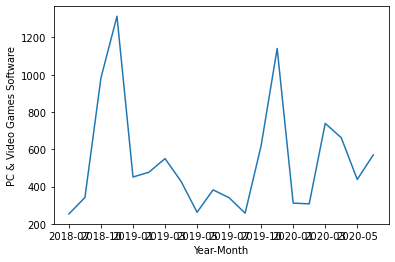

In [40]:
lp = sns.lineplot(x='Year-Month', y='PC & Video Games Software', data=gamesales_1_df.sort_values('Year-Month'))
lp.xaxis.set_major_locator(ticker.MultipleLocator(2))
lp

There are two large peaks near December for both 2018 and 2019. After 2018, there was a significant decline for several months. However, this decline did not last nearly as long in the early months of 2020, when lockdown started to pick up in the US.

Now a similar graph, but including microtransactions after July 2020.

<AxesSubplot:xlabel='Year-Month', ylabel='Video Game Content'>

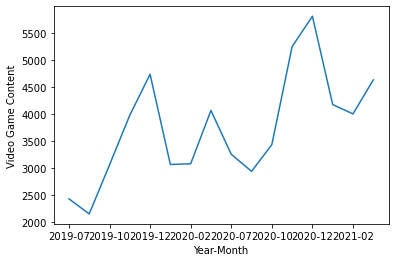

In [41]:
lp = sns.lineplot(x='Year-Month', y='Video Game Content', data=gamesales_2_df.sort_values('Year-Month'))
lp.xaxis.set_major_locator(ticker.MultipleLocator(2))
lp

After the spike near when lockdown in the US started, there was another decline, which could be attributed to boost in sales from the initial excitement of being in lockdown. Unlike in the first graph, where the second December peak was lower than the first, the 2020 December peak was higher than 2019's, indicating that video games in general grew more in popularity between December 2019 and December 2020 than between December 2018 and December 2019. The spike near spring/summer of 2020 was also much more pronounced than in spring/summer of 2019.

Because we don't know the impact microtransactions have on these game sales data, it is hard to make comparisons between the money values between the two graphs.

We want to see how many of each county order status there is over time.

<AxesSubplot:xlabel='Date', ylabel='County'>

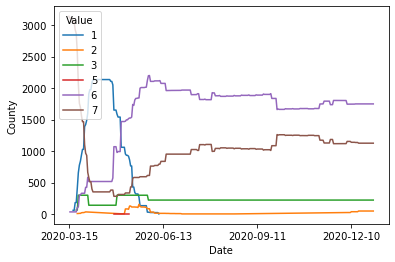

In [42]:
lp = sns.lineplot(x='Date', y='County', hue='Value', palette='tab10', data=lockdown.groupby(by=['Date', 'Value']).count())
lp.xaxis.set_major_locator(ticker.MultipleLocator(90))
lp

Looking at the line for lockdown status 7, at the beginning, the middle of March, most counties had the highest level of lockdown. This quickly dropped as counties began to lower to status 6, "all people in certain areas of state," near May. From there, the number of counties in either status 7 or 6 stabilized.

Ideally, we would like to see the population of each county, but since there are too many, we'll group them together by state and look at the population of each state, since we expect county order statuses to be mostly the same across counties in the same state.

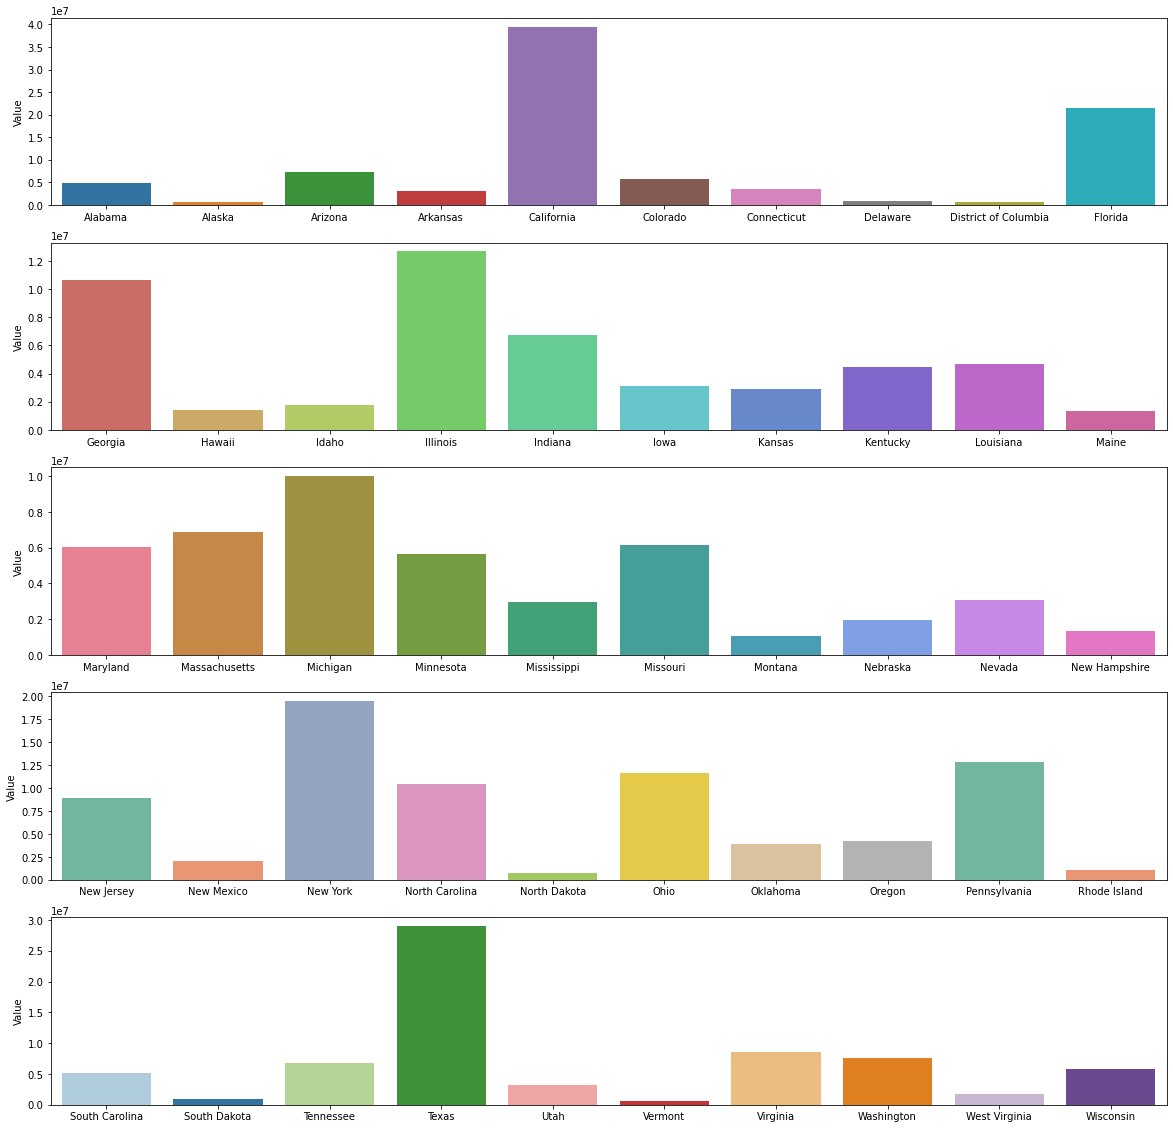

In [43]:
# Group by state; population by state
p = [sns.color_palette('tab10', 10), sns.color_palette("hls", 10), sns.color_palette("husl", 10), sns.color_palette("Set2"), sns.color_palette("Paired")]
f, axes = plt.subplots(5, 1, figsize=(20, 20))
k = 0
for i in range(0, 41, 10):
    states = population_county['State'].unique()[i:i+10]
    sns.barplot(x=states, y='Value', ax=axes[k], palette=p[k], data=population_county.groupby(by=['State']).sum().iloc[i:i+10])
    k += 1

In these graphs, we compare the populations of the 50 states in the US. The states with the highest populations are California, Texas, New York, and Florida. 

In [137]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

top_games_2020 = complete_steam.loc[complete_steam[complete_steam['year']== 2020].groupby('month')['avg'].idxmax().values]
top_games_2020['month'] = pd.Categorical(top_games_2020['month'], categories = months)
top_games_2020.sort_values(by='month')

,gamename,year,month,avg,gain,peak,avg_peak_perc,genres
13,counter-strike: global offensive,2020,January,501196.00,44494.44,817229,61.3287%,"[Action, Free to Play]"
12,counter-strike: global offensive,2020,February,543979.15,42783.15,916996,59.3219%,"[Action, Free to Play]"
11,counter-strike: global offensive,2020,March,671033.29,127054.13,1145972,58.5558%,"[Action, Free to Play]"
10,counter-strike: global offensive,2020,April,857604.22,186570.94,1305714,65.6809%,"[Action, Free to Play]"
9,counter-strike: global offensive,2020,May,768795.25,-88808.97,1193359,64.4228%,"[Action, Free to Play]"
8,counter-strike: global offensive,2020,June,671647.46,-97147.79,1009467,66.5349%,"[Action, Free to Play]"
7,counter-strike: global offensive,2020,July,625900.81,-45746.65,857560,72.9862%,"[Action, Free to Play]"
6,counter-strike: global offensive,2020,August,639957.66,14056.85,925348,69.1586%,"[Action, Free to Play]"
5,counter-strike: global offensive,2020,September,606850.32,-33107.34,977769,62.0648%,"[Action, Free to Play]"
4,counter-strike: global offensive,2020,October,613666.69,6816.37,943876,65.0156%,"[Action, Free to Play]"


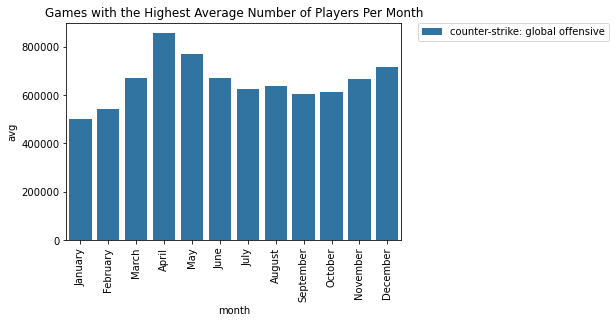

In [138]:
ax = sns.barplot(x='month', y='avg', hue='gamename', data=top_games_2020)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Games with the Highest Average Number of Players Per Month');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Counter-Strike: Global Offensive is the most popular game of 2020. Using this graph, we want to compare the number of average players and the lockdown statuses of counties. During March, we can see more than a 127,054 player increase compared to February. Then in April, there is a 186,570 player increase from March. But after April, there is a decline in the highest average number of players.

This increase in highest average number of players is consistent with the line of lockdown status 7. During March, both the number of counties and the number of Counter-Strike: Global Offensive average players started to increase. And when the number of counties of lockdown status 7 started to decrease after April, the number of Counter-Strike: Global Offensive average players also started to decrease.

In [140]:
gain_games_2020 = complete_steam.loc[complete_steam[complete_steam['year']== 2020].groupby('month')['gain'].idxmax().values]
gain_games_2020['month'] = pd.Categorical(gain_games_2020['month'], categories = months)
gain_games_2020.sort_values(by='month')

,gamename,year,month,avg,gain,peak,avg_peak_perc,genres
25814,monster hunter: world,2020,January,113236.24,82737.26,284090,39.8593%,[Action]
12,counter-strike: global offensive,2020,February,543979.15,42783.15,916996,59.3219%,"[Action, Free to Play]"
11,counter-strike: global offensive,2020,March,671033.29,127054.13,1145972,58.5558%,"[Action, Free to Play]"
10,counter-strike: global offensive,2020,April,857604.22,186570.94,1305714,65.6809%,"[Action, Free to Play]"
25226,terraria,2020,May,129808.62,78493.53,486918,26.6592%,"[Action, Adventure, Indie, RPG]"
899,destiny 2,2020,June,77550.23,25712.82,213681,36.2925%,"[Action, Adventure, Free to Play]"
25808,monster hunter: world,2020,July,48079.80,23934.18,144000,33.3888%,[Action]
33392,risk of rain 2,2020,August,25249.95,20718.12,71033,35.5468%,"[Action, Indie]"
736,path of exile,2020,September,32050.11,13220.61,121595,26.3581%,"[Action, Adventure, Free to Play, Indie, Massi..."
667,rocket league,2020,October,72355.61,19247.43,140667,51.4375%,"[Action, Indie, Racing, Sports]"


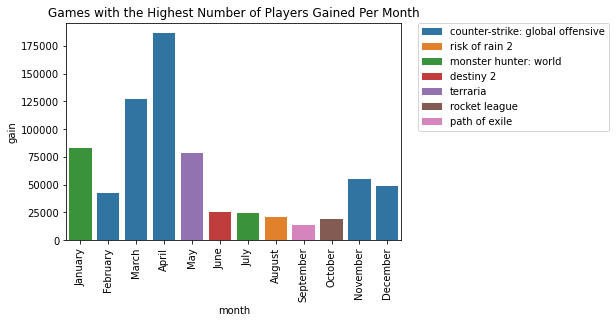

In [141]:
ax = sns.barplot(x='month', y='gain', hue='gamename', data=gain_games_2020, dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Games with the Highest Number of Players Gained Per Month');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From February to April, Counter-Strike: Global Offensive gained the highest number of average players when lockdown 7 was increasing. Then from May to July, multiplayer RPG games like Terraria, Destiny 2, and Monster Hunter: World gained more players and became the games with the highest number of gained players when lockdown 7 was decreasing.

In [142]:
lost_gain_2020 = complete_steam.loc[complete_steam[complete_steam['year']== 2020].groupby('month')['gain'].idxmin().values]
lost_gain_2020['month'] = pd.Categorical(lost_gain_2020['month'], categories = months)
lost_gain_2020.sort_values(by='month')

,gamename,year,month,avg,gain,peak,avg_peak_perc,genres
219,playerunknown's battlegrounds,2020,January,275363.04,-33082.41,645414,42.6646%,"[Action, Adventure, Massively Multiplayer]"
743,path of exile,2020,February,17581.66,-22397.11,41010,42.8716%,"[Action, Adventure, Free to Play, Indie, Massi..."
217,playerunknown's battlegrounds,2020,March,228467.17,-29117.16,562028,40.6505%,"[Action, Adventure, Massively Multiplayer]"
5734,borderlands 3,2020,April,22173.78,-30951.19,49479,44.8145%,"[Action, RPG]"
9,counter-strike: global offensive,2020,May,768795.25,-88808.97,1193359,64.4228%,"[Action, Free to Play]"
8,counter-strike: global offensive,2020,June,671647.46,-97147.79,1009467,66.5349%,"[Action, Free to Play]"
7,counter-strike: global offensive,2020,July,625900.81,-45746.65,857560,72.9862%,"[Action, Free to Play]"
109,dota 2,2020,August,429717.12,-20496.87,666138,64.5087%,"[Action, Free to Play, Strategy]"
3736,fall guys: ultimate knockout,2020,September,66899.48,-57579.87,150587,44.4258%,"[Action, Casual, Indie, Massively Multiplayer,..."
3735,fall guys: ultimate knockout,2020,October,26438.47,-40461.01,83964,31.4879%,"[Action, Casual, Indie, Massively Multiplayer,..."


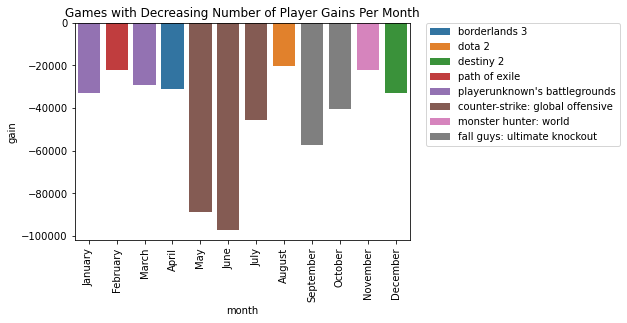

In [143]:
ax = sns.barplot(x='month', y='gain', hue='gamename', data=lost_gain_2020, dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Games with Decreasing Number of Player Gains Per Month');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

During March and April, PLAYERUNKNOWN'S BATTLEGROUNDS and Borderlands 3 were the games with the highest decreasing number of players. Then from May to July, Counter-Strike: Global Offensive was the game with the highest decreasing number of players.

## Comparisons

During the increase of counties implementing lockdown status 7 from March to April, Counter Strike: Global Offensive saw the most growth out of any game. But after the decrease of counties with lockdown status 7, Counter Strike: Global Offensive was the game with the highest decreasing number of players from May to July. 

When the number of counties with lockdown status 7 starting decreasing, multiplayer RPG games like Terraria, Destiny 2, and Monster Hunter: World saw an increase in the highest number of average players.

In [50]:
merge = pd.merge(lockdown, population_county, on='countyFIPS', how='left')
merge.head()

,stateFIPS_x,State_x,countyFIPS,County_x,Year_x,Value_x,County Order Status,Year-Month,Date,stateFIPS_y,State_y,County_y,Year_y,Value_y
0,1,Alabama,1001,Autauga,20200315,7,Mandatory - all people (7),2020-03,2020-03-15,1,Alabama,Autauga,2019,55869
1,1,Alabama,1001,Autauga,20200316,7,Mandatory - all people (7),2020-03,2020-03-16,1,Alabama,Autauga,2019,55869
2,1,Alabama,1001,Autauga,20200317,7,Mandatory - all people (7),2020-03,2020-03-17,1,Alabama,Autauga,2019,55869
3,1,Alabama,1001,Autauga,20200318,7,Mandatory - all people (7),2020-03,2020-03-18,1,Alabama,Autauga,2019,55869
4,1,Alabama,1001,Autauga,20200319,7,Mandatory - all people (7),2020-03,2020-03-19,1,Alabama,Autauga,2019,55869


In [51]:
merge = merge.drop(['stateFIPS_y','State_y','County_y','Year_y'], axis=1)
merge.head()

,stateFIPS_x,State_x,countyFIPS,County_x,Year_x,Value_x,County Order Status,Year-Month,Date,Value_y
0,1,Alabama,1001,Autauga,20200315,7,Mandatory - all people (7),2020-03,2020-03-15,55869
1,1,Alabama,1001,Autauga,20200316,7,Mandatory - all people (7),2020-03,2020-03-16,55869
2,1,Alabama,1001,Autauga,20200317,7,Mandatory - all people (7),2020-03,2020-03-17,55869
3,1,Alabama,1001,Autauga,20200318,7,Mandatory - all people (7),2020-03,2020-03-18,55869
4,1,Alabama,1001,Autauga,20200319,7,Mandatory - all people (7),2020-03,2020-03-19,55869


In [52]:
merge.columns = ['stateFIPS', 'State', 'countyFIPS', 'County', 'Year', 'Value',
       'County Order Status', 'Year-Month', 'Date', 'Population']
merge.head()

,stateFIPS,State,countyFIPS,County,Year,Value,County Order Status,Year-Month,Date,Population
0,1,Alabama,1001,Autauga,20200315,7,Mandatory - all people (7),2020-03,2020-03-15,55869
1,1,Alabama,1001,Autauga,20200316,7,Mandatory - all people (7),2020-03,2020-03-16,55869
2,1,Alabama,1001,Autauga,20200317,7,Mandatory - all people (7),2020-03,2020-03-17,55869
3,1,Alabama,1001,Autauga,20200318,7,Mandatory - all people (7),2020-03,2020-03-18,55869
4,1,Alabama,1001,Autauga,20200319,7,Mandatory - all people (7),2020-03,2020-03-19,55869


# Ethics & Privacy

Most of our data contains general information about video games and not the people playing these video games specifically (anonymized), therefore there is no concern for privacy of individuals. Our datasets are also licensed under the CC by 4.0 license or are available in the public domain. On the other hand, since our data of the number of people in lockdown is aggregated from a list of countries/regions, there may be a bias towards countries that entered lockdown and have a percentage of population with Internet access greater than the worldwide average. For example, if a large developing country entered lockdown, it may not affect games’ popularity much but would greatly influence the number of people in lockdown. This bias cannot be removed from our data, but it can be mitigated by looking at a large number of countries.

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

- Thuycam Nguyen
- Shania Ie
- Tiffany Ho
- Shawn Kim
- Karina Sevilla